### Chapter 3

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [ ]:
# P(vampire|positive) = P(postitive|vampire)P(vampire) / P(positive)

In [2]:
# code 3.2
p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

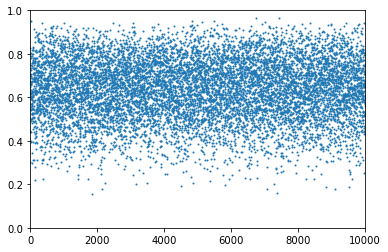

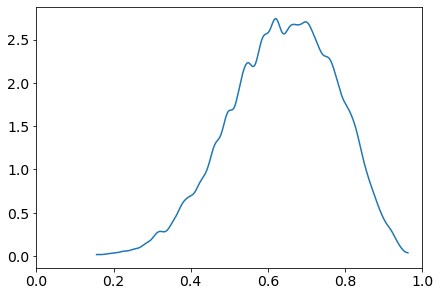

In [28]:
# code 3.3 - 3.5
nsamples = int(1e4)
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)
plt.scatter(np.arange(nsamples), samples, s=1)
plt.ylim([0,1])
plt.xlim([0,nsamples])
plt.show()

az.plot_kde(samples)
plt.xlim([0,1]);

In [29]:
# code 3.6
np.sum(posterior[p_grid<0.5])

0.17187458902022873

In [30]:
# code 3.7
np.sum(samples < 0.5) / nsamples

0.1668

In [35]:
# code 3.8
np.sum([(samples > 0.5) & (samples < 0.75)]) / nsamples

0.6073

In [36]:
# code 3.9
np.quantile(samples, 0.8)

0.7607607607607607

In [37]:
# code 3.10
np.quantile(samples, (0.1, 0.9))

array([0.45445445, 0.81281281])

In [39]:
# code 3.11
p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(3, n=3, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)

In [41]:
# code 3.12
np.quantile(samples, (0.25, 0.75))

array([0.7007007 , 0.92992993])

In [43]:
# code 3.13
az.hdi(samples, hdi_prob=0.5)

array([0.83783784, 0.996997  ])

In [46]:
# code 3.14
p_grid[np.argmax(posterior)]

1.0

In [49]:
# code 3.15
stats.mode(samples)[0][0]

0.968968968968969

In [50]:
# code 3.16
print(np.mean(samples), np.median(samples))

0.7978482482482483 0.8408408408408409


In [51]:
# code 3.17
np.sum(posterior * np.abs(0.5 - p_grid))

0.31287518749981214

In [53]:
# code 3.18
loss = [np.sum(posterior*np.abs(d - p_grid)) for d in p_grid] 

In [54]:
# code 3.19
p_grid[np.argmin(loss)]

0.8408408408408409